### *Update the params*

**Stochastic Gradient Descent(SGD)**

$\textbf{W} \leftarrow \textbf{W} - \eta \frac{\partial L}{\partial \textbf{W}}$

In [9]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        # params: a dict of params and their value
        # grads: a dict of params and their gradients
        for key in params.keys():
            params[key] -= self.lr * grads[key]


**Drawbacks in SGD** 

take function below as an example:<br>
$f(x, y) = \frac{1}{20}x^2 + y^2$


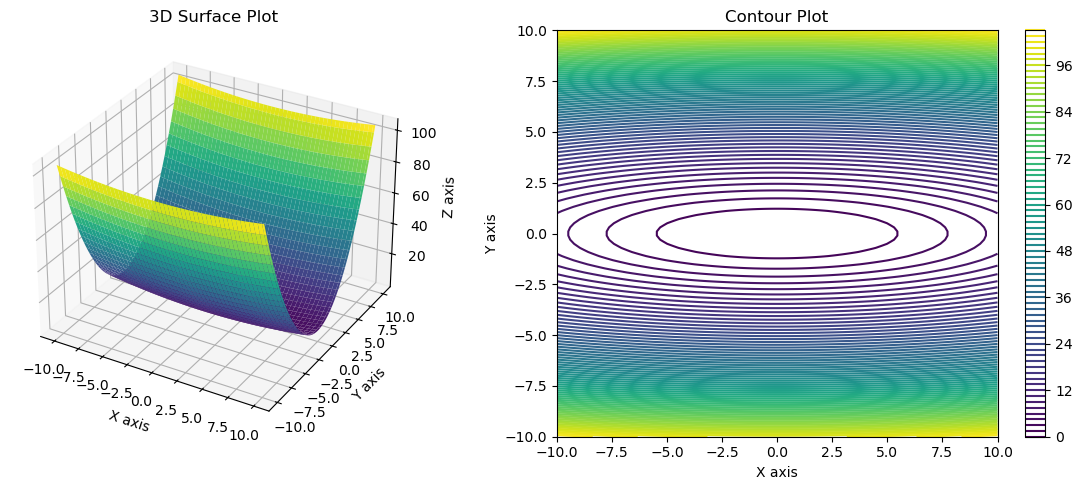

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def f(x, y):
    return x**2 / 20 + y**2

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(12, 5))  

ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap=cm.viridis, edgecolor='none') 
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')
ax1.set_title('3D Surface Plot')

ax2 = fig.add_subplot(122)  
contour = ax2.contour(X, Y, Z, levels=100, cmap='viridis') 
plt.colorbar(contour, ax=ax2) 
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_title('Contour Plot')

plt.tight_layout()

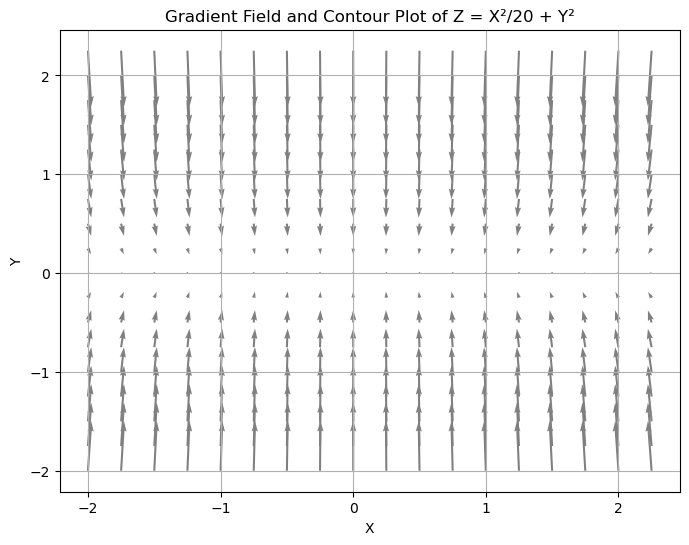

In [11]:
def gradient(x, y):
    df_dx = x / 10 
    df_dy = 2 * y   
    return df_dx, df_dy

x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

df_dx, df_dy = gradient(X, Y)


plt.figure(figsize=(8, 6))
plt.quiver(X, Y, -df_dx, -df_dy, color='grey', scale=50, angles="xy") 
# plt.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.5) 
plt.title('Gradient Field and Contour Plot of Z = X²/20 + Y²') 
plt.xlabel('X') 
plt.ylabel('Y')  
plt.grid(True)  

Observe the graphs above
not all the arrows point to the lowest point (0,0) <br>
If we directly apply SGD on this function, we'll find the low efficiency in the shape of a "之"<br>
the book says so, but I cannot reproduce the situation with a low learning rate  **:<** SAD

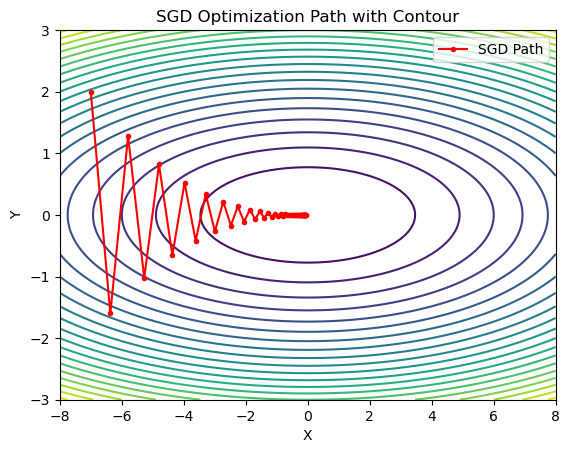

In [29]:
def sgd_step(X, Y, lr=0.1):
    grad = gradient(X, Y)
    X_new = X - lr * grad[0]
    Y_new = Y - lr * grad[1]
    return X_new, Y_new

lr = 0.9
iterations = 50
start_point = np.array([-7, 2])

path = [start_point]

X, Y = start_point

for _ in range(iterations):
    X, Y = sgd_step(X, Y, lr)
    path.append(np.array([X, Y]))

    x_vals = np.linspace(-8, 8, 100)
y_vals = np.linspace(-3, 3, 100)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z_grid = f(X_grid, Y_grid)

plt.contour(X_grid, Y_grid, Z_grid, levels=20, cmap='viridis')

path = np.array(path)

plt.plot(path[:, 0], path[:, 1], marker='o', color='red', markersize=3, label='SGD Path')

plt.title('SGD Optimization Path with Contour')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

**Momentum**

$\textbf{v} \leftarrow \alpha\textbf{v} - \eta\frac{\partial{L}}{\partial{\textbf{W}}}$ <br>
$\textbf{W} \leftarrow \textbf{W} + \textbf{v}$

the first expression is a representation of the force in the gradient direction<br>
$\alpha$ is a damping factor when no force on W

In [30]:
# implementation of momentum
class momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

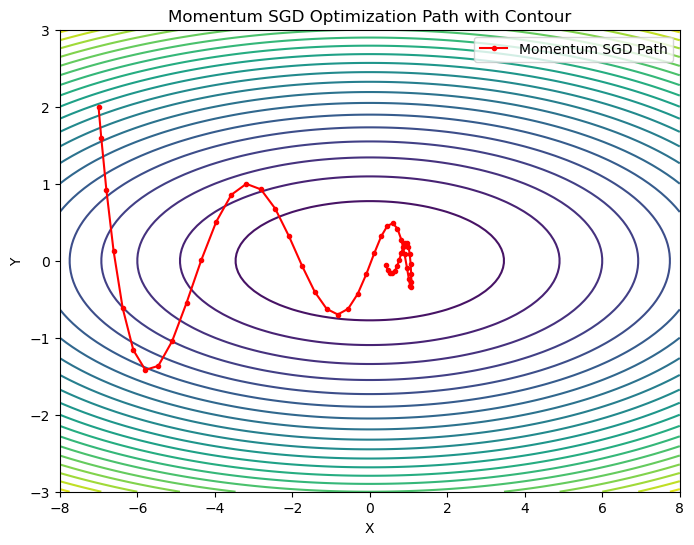

In [31]:
def momentum_sgd(X, Y, lr=0.1, beta=0.9, v=np.array([0, 0])):
    grad = gradient(X, Y)
    v = beta * v + grad 
    X_new = X - lr * v[0]
    Y_new = Y - lr * v[1]
    return X_new, Y_new, v

lr = 0.1    
beta = 0.9    
iterations = 50  
start_point = np.array([-7, 2]) 

path = [start_point]
velocity = np.array([0, 0])

X, Y = start_point

for _ in range(iterations):
    X, Y, velocity = momentum_sgd(X, Y, lr, beta, velocity)
    path.append(np.array([X, Y]))

x_vals = np.linspace(-8, 8, 100)
y_vals = np.linspace(-3, 3, 100)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z_grid = f(X_grid, Y_grid)

plt.figure(figsize=(8, 6))
plt.contour(X_grid, Y_grid, Z_grid, levels=20, cmap='viridis')

path = np.array(path)

plt.plot(path[:, 0], path[:, 1], marker='o', color='red', markersize=3, label='Momentum SGD Path')

plt.title('Momentum SGD Optimization Path with Contour')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

**AdaGrad**

Ada here means adaptive. We adpot an idea of learning rate decay -- decrease the lr in the learning process

$\textbf{h} \leftarrow \textbf{h} + \frac{\partial{L}}{\partial{\textbf{W}}} \odot \frac{\partial{L}}{\partial{\textbf{W}}}$ <br><br>
$\textbf{W} \leftarrow \textbf{W} - \eta\frac{1}{\sqrt{\textbf{h}}}\frac{\partial{L}}{\partial{\textbf{W}}}$

here $\odot$ represents matrix multiply <bf>
$\textbf{h}$ stores the sum of square of all the previous gradients

p.s. we may use RMSProp to forget the past gradients -- "Exponential Moving Average"

In [33]:
# implementation of AdaGrad
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [36]:
class RMSprop:

    """RMSprop"""

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

if we combine AdaGrad and Momentum, then we will get Adam

In [37]:
class Adam:

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

compare different skills in medel learning

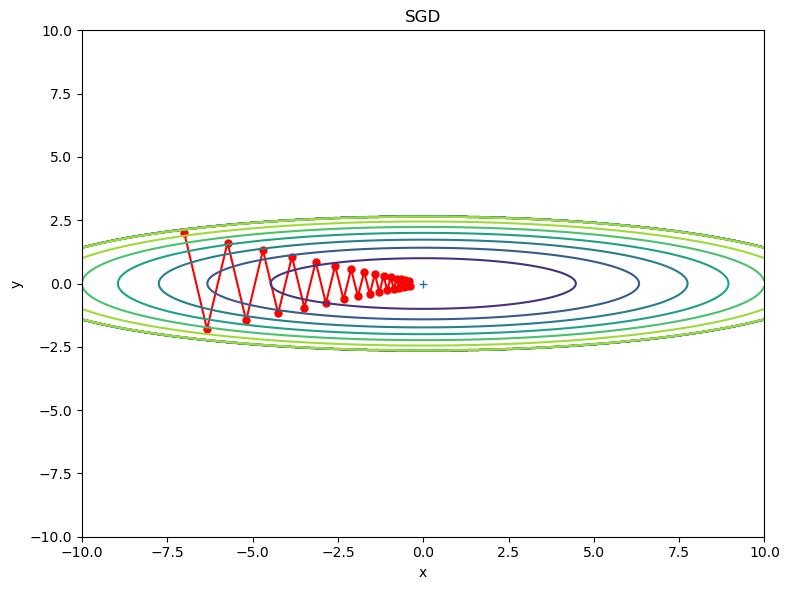

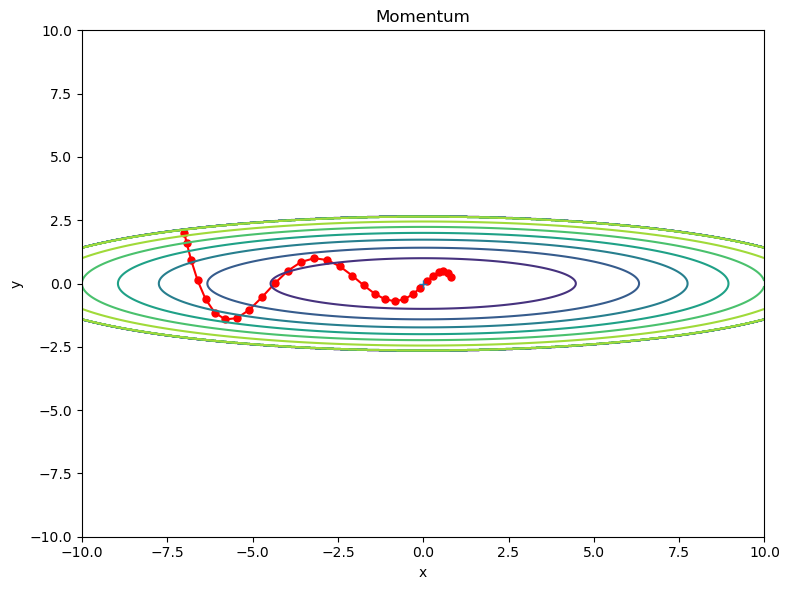

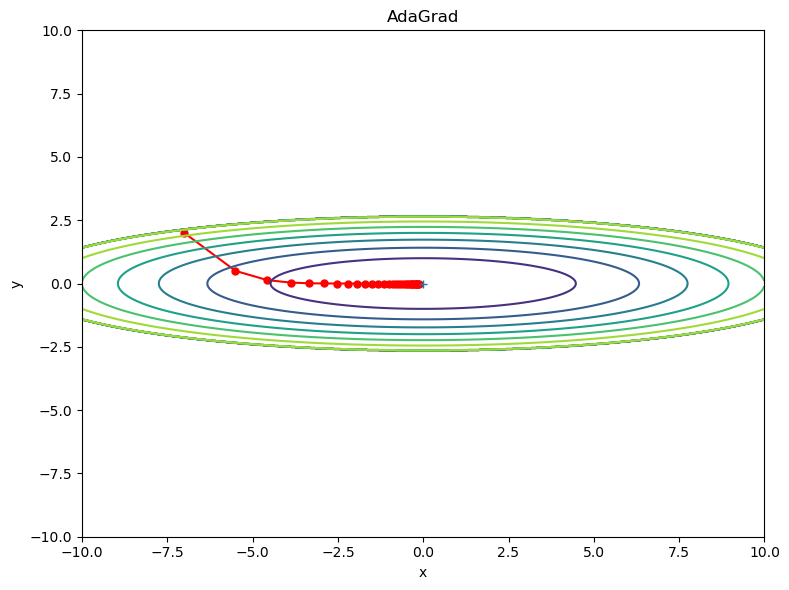

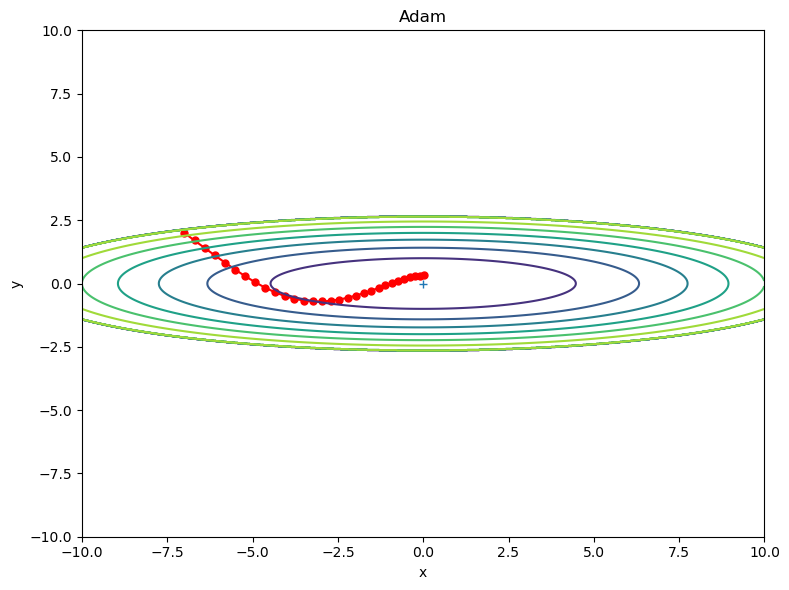

In [56]:
from collections import OrderedDict
def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)
# optimizers['RMSProp'] = RMSprop(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    fig = plt.figure(figsize=(8,6))
    # plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red", markersize=5)
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')

    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.tight_layout()

===========iteration:0===========
SGD:2.308154415757172
Momentum:2.3177505236397247
AdaGrad:1.9791619426244846
Adam:2.1535984854224886
===========iteration:100===========
SGD:1.3506985563767004
Momentum:0.24000253311287936
AdaGrad:0.10660865693883392
Adam:0.13829679324947192
===========iteration:200===========
SGD:0.6460974700938411
Momentum:0.22169235075784777
AdaGrad:0.08893386917376667
Adam:0.19446272887373622
===========iteration:300===========
SGD:0.5932327795671084
Momentum:0.18541720652661697
AdaGrad:0.07933166991956159
Adam:0.16632050934305945
===========iteration:400===========
SGD:0.44286173251778843
Momentum:0.14379092024925222
AdaGrad:0.04877966273250499
Adam:0.07918238330690884
===========iteration:500===========
SGD:0.39314713528867995
Momentum:0.10925132457622724
AdaGrad:0.06389289479052424
Adam:0.09450693576211718
===========iteration:600===========
SGD:0.4748996607557435
Momentum:0.1521587005652639
AdaGrad:0.06711576954797607
Adam:0.11994428092300419
===========iterati

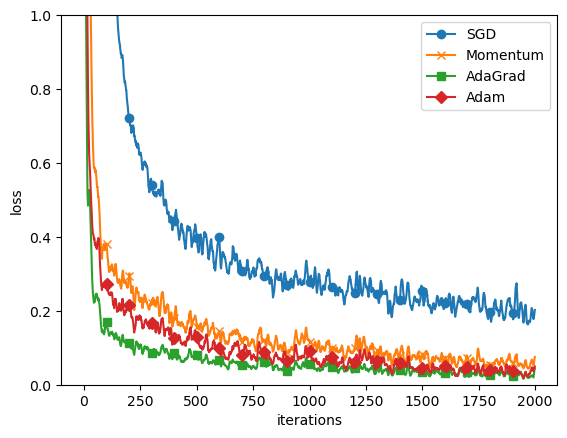

In [57]:
# apply them on MNIST to see the difference
import os
import sys
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0:读入MNIST数据==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:进行实验的设置==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2:开始训练==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.绘制图形==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

## **Initial Value of Weight**

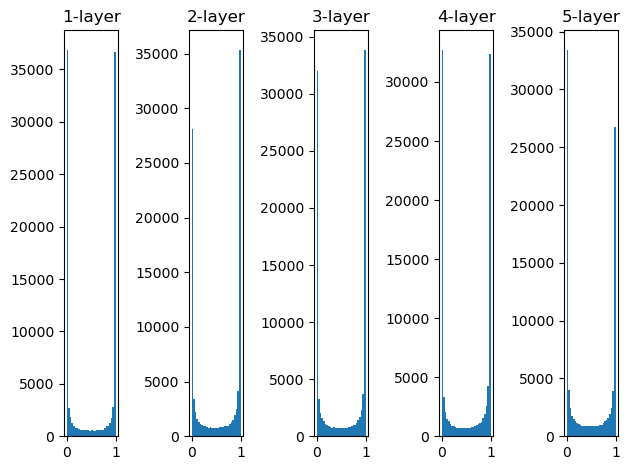

In [59]:
# observe the activation value distribution of the hidden layer
from common.functions import sigmoid
x = np.random.randn(1000, 100)
node_num = 100 # neuron number in hidden layer
hidden_layer_size = 5 # 5 h0idden layers
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 1

    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

for i,a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.tight_layout()

**Apparently, values clusters towards 0 and 1** <br>
Consider the sigmoid function, \*BOOB\* , **Gradient Vanishing**

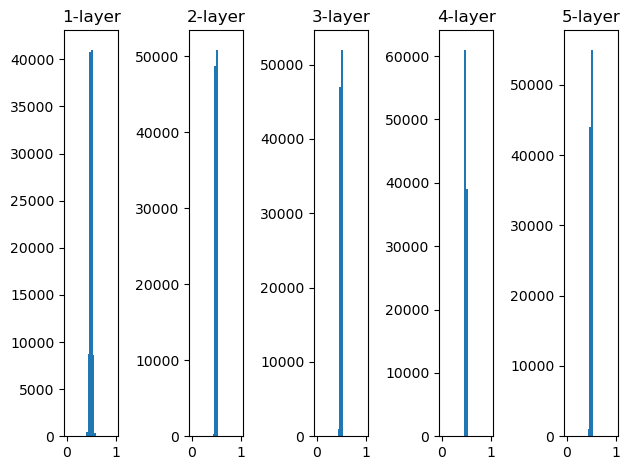

In [60]:
from common.functions import sigmoid
x = np.random.randn(1000, 100)
node_num = 100 # neuron number in hidden layer
hidden_layer_size = 5 # 5 h0idden layers
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01 # lets change the standard deviation

    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

for i,a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.tight_layout()

NO Gradient Vanishing, but almost all the neurons present the ***same*** output. Awful ! ! !

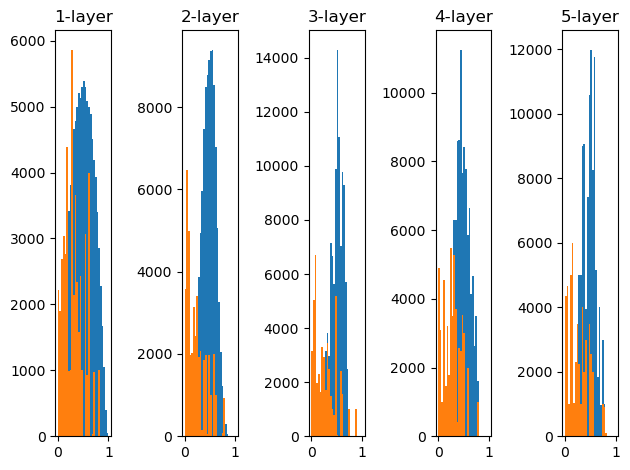

In [70]:
# use Xavier init value -- good for sigmoid and tanh (symmetry and approximate linear centrally)
from common.functions import sigmoid
x = np.random.randn(1000, 100)
node_num = 100 # neuron number in hidden layer
hidden_layer_size = 5 # 5 h0idden layers
activations = {}


for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)

    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

for i,a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.tight_layout()

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)

    z = np.dot(x, w)
    a = np.tanh(z)
    activations[i] = a

for i,a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.tight_layout()

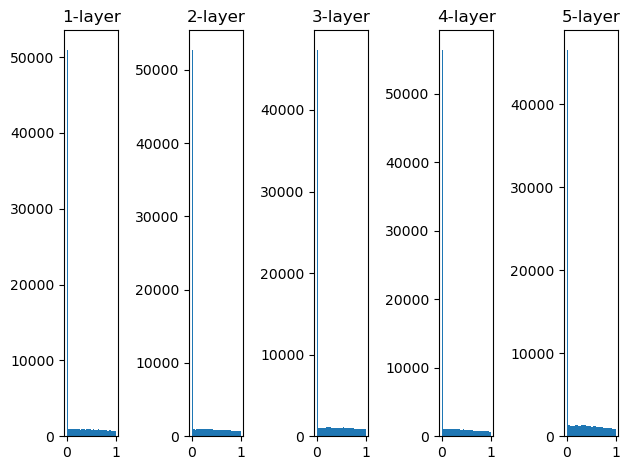

In [73]:
# He(Kaiming He) init value -- better for RELU
from common.functions import relu
x = np.random.randn(1000, 100)
node_num = 100 # neuron number in hidden layer
hidden_layer_size = 5 # 5 h0idden layers
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    z = np.dot(x, w)
    a = relu(z)
    activations[i] = a

for i,a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.tight_layout()

===========iteration:0===========
std=0.01:2.3024510440284467
Xavier:2.3121739935711245
He:2.419936628971008
===========iteration:100===========
std=0.01:2.3023401386236033
Xavier:2.2568631025604273
He:1.626805281172182
===========iteration:200===========
std=0.01:2.301340164818931
Xavier:2.187981600600279
He:0.6962800417683991
===========iteration:300===========
std=0.01:2.301894814795536
Xavier:1.9910663104050466
He:0.5116291369110612
===========iteration:400===========
std=0.01:2.3002342355818723
Xavier:1.6264649648592737
He:0.4590361510567312
===========iteration:500===========
std=0.01:2.30135569767707
Xavier:1.0563546027963167
He:0.37660727836799746
===========iteration:600===========
std=0.01:2.301457547727156
Xavier:0.7667049452323977
He:0.28158164978164946
===========iteration:700===========
std=0.01:2.300668961910897
Xavier:0.6969209814934302
He:0.4213735656815203
===========iteration:800===========
std=0.01:2.303101887169978
Xavier:0.6038984438818128
He:0.365097134113252
===

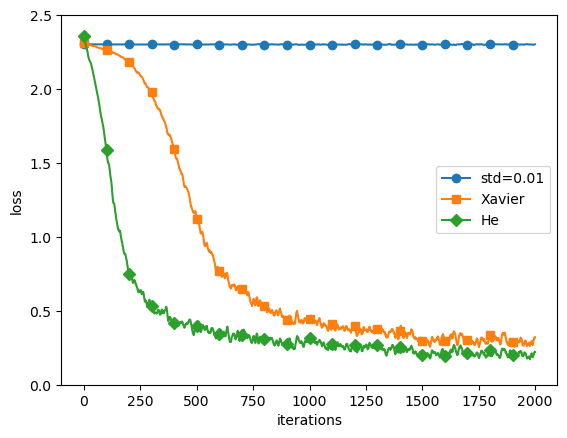

In [74]:
# compare the three init weight set in MNIST
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:开始训练==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.绘制图形==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

***Kaiming He yyds ! ! !***

## ***Other Skills in Learning***
### ***1. Batch Normalization***
accelerate learning <br>
alleviate depence on init value <br>
restrain overfitting <br><br>
**p.s.** find experiment details in *batch_norm_gradient_check.py* and *batch_norm_test.py*
### ***2. Regularization***
weight decay (l1, l2, etc.) -> restrain overfitting<br><br>
**p.s.** find experiment details in *overfit_weight_decay.py*
### ***3. Dropout***
restrain overfitting caused by high model complexity<br><br>
**p.s.** find experiment details in *overfit_dropout.py*
### ***4. Hyper-parameters Optimization***
**p.s.** find experiment details in *hyperparameter_optimization.py*



